In [65]:
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import __init__
from __init__ import DATA_PATH
from __init__ import PACKAGE_PATH
import matplotlib.pyplot as plt
import os
import sklearn.metrics as metrics

In [4]:
data = pd.read_csv(os.path.join(DATA_PATH,'BOD_biclass_139rdkit.csv'))

In [5]:
data.head()

,SMILES,bod_class,exactmw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeteroatoms,NumAmideBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,0,232.084792,5.0,2.0,2.0,2.0,3.0,5.0,4.0,...,0,0,0,2,0,0,0,0,0,0
1,CC(O)C(O)=O,1,90.031694,3.0,2.0,1.0,2.0,2.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl,0,351.914689,0.0,0.0,2.0,0.0,0.0,5.0,0.0,...,0,0,0,2,0,0,0,0,0,0
3,OC(=O)c1c(Cl)ccc(Cl)c1Cl,1,223.919862,2.0,1.0,1.0,1.0,1.0,5.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,OCC(O)C(O)C(O)C(O)CO,1,182.079038,6.0,6.0,5.0,6.0,6.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.shape

(1063, 141)

In [8]:
data_139 = data.iloc[:,2:141]
data_139.shape

(1063, 139)

In [14]:
data_train = data_139.values
data_train

array([[232.08479224,   5.        ,   2.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 90.03169405,   3.        ,   2.        , ...,   0.        ,
          0.        ,   0.        ],
       [351.91468869,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [416.05552905,   8.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [314.20345083,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [160.10994437,   3.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

### start with a simple vanilla autoencoder

In [77]:
input_size = 139
hidden_size = 16
output_size = 139

x = Input(shape=(input_size,))

# Encoder
h = Dense(hidden_size, activation='relu')(x)

# Decoder
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(input=x, output=r)
autoencoder.compile(optimizer='adam', loss='mse')

C:\Users\Yang\.conda\envs\deepchembed\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [78]:
history16 = autoencoder.fit(data_train,data_train,epochs= 250,batch_size=256,shuffle=True)

Epoch 1/250
1063/1063 [==============================] - 0s 367us/step - loss: 1325.5094
Epoch 2/250
1063/1063 [==============================] - 0s 17us/step - loss: 1324.6279
Epoch 3/250
1063/1063 [==============================] - 0s 23us/step - loss: 1323.4903
Epoch 4/250
1063/1063 [==============================] - 0s 21us/step - loss: 1322.3217
Epoch 5/250
1063/1063 [==============================] - 0s 16us/step - loss: 1321.3444
Epoch 6/250
1063/1063 [==============================] - 0s 19us/step - loss: 1320.7939
Epoch 7/250
1063/1063 [==============================] - 0s 20us/step - loss: 1320.4222
Epoch 8/250
1063/1063 [==============================] - 0s 16us/step - loss: 1320.1390
Epoch 9/250
1063/1063 [==============================] - 0s 16us/step - loss: 1319.8759
Epoch 10/250
1063/1063 [==============================] - 0s 18us/step - loss: 1319.6305
Epoch 11/250
1063/1063 [==============================] - 0s 18us/step - loss: 1319.4040
Epoch 12/250
1063/1063 [=====

1063/1063 [==============================] - 0s 19us/step - loss: 1318.3569
Epoch 94/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.3564
Epoch 95/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.3559
Epoch 96/250
1063/1063 [==============================] - 0s 17us/step - loss: 1318.3557
Epoch 97/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.3553
Epoch 98/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.3548
Epoch 99/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.3546
Epoch 100/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.3543
Epoch 101/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.3540
Epoch 102/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.3540
Epoch 103/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.3535
Epoch 104/250
1063/1063 [=====

1063/1063 [==============================] - 0s 15us/step - loss: 1318.3194
Epoch 185/250
1063/1063 [==============================] - 0s 15us/step - loss: 1318.3188
Epoch 186/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.3178
Epoch 187/250
1063/1063 [==============================] - 0s 15us/step - loss: 1318.3169
Epoch 188/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.3163
Epoch 189/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.3154
Epoch 190/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.3147
Epoch 191/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.3141
Epoch 192/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.3129
Epoch 193/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.3120
Epoch 194/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.3115
Epoch 195/250
1063/1063 

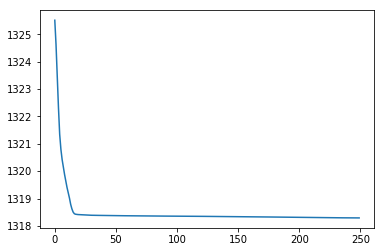

In [79]:
plt.plot(history16.history['loss'])

In [80]:
x_recons=autoencoder.predict(data_train)

In [81]:
x_recons.shape

(1063, 139)

In [82]:
metrics.mean_squared_error(data_train,x_recons)

1318.2906930943482

In [83]:
input_size = 139
hidden_size = 32 # larger hidden layer
output_size = 139

x = Input(shape=(input_size,))

# Encoder
h = Dense(hidden_size, activation='relu')(x)

# Decoder
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(input=x, output=r)
autoencoder.compile(optimizer='adam', loss='mse')

C:\Users\Yang\.conda\envs\deepchembed\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [ ]:
#larger hidden layer

In [84]:
history32 = autoencoder.fit(data_train,data_train,epochs= 250,batch_size=256,shuffle=True)

Epoch 1/250
1063/1063 [==============================] - 0s 427us/step - loss: 1324.7684
Epoch 2/250
1063/1063 [==============================] - 0s 22us/step - loss: 1323.5862
Epoch 3/250
1063/1063 [==============================] - 0s 19us/step - loss: 1322.2744
Epoch 4/250
1063/1063 [==============================] - 0s 23us/step - loss: 1321.2524
Epoch 5/250
1063/1063 [==============================] - 0s 26us/step - loss: 1320.6055
Epoch 6/250
1063/1063 [==============================] - 0s 17us/step - loss: 1319.9073
Epoch 7/250
1063/1063 [==============================] - 0s 19us/step - loss: 1319.3944
Epoch 8/250
1063/1063 [==============================] - 0s 19us/step - loss: 1319.1249
Epoch 9/250
1063/1063 [==============================] - 0s 18us/step - loss: 1319.0191
Epoch 10/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.9340
Epoch 11/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.8856
Epoch 12/250
1063/1063 [=====

1063/1063 [==============================] - 0s 21us/step - loss: 1318.2809
Epoch 94/250
1063/1063 [==============================] - 0s 17us/step - loss: 1318.2800
Epoch 95/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.2796
Epoch 96/250
1063/1063 [==============================] - 0s 15us/step - loss: 1318.2782
Epoch 97/250
1063/1063 [==============================] - 0s 16us/step - loss: 1318.2776
Epoch 98/250
1063/1063 [==============================] - 0s 26us/step - loss: 1318.2770
Epoch 99/250
1063/1063 [==============================] - 0s 24us/step - loss: 1318.2773
Epoch 100/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.2755
Epoch 101/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2752
Epoch 102/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.2745
Epoch 103/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.2731
Epoch 104/250
1063/1063 [=====

1063/1063 [==============================] - 0s 23us/step - loss: 1318.2367
Epoch 185/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.2363
Epoch 186/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.2357
Epoch 187/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.2359
Epoch 188/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.2359
Epoch 189/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.2355
Epoch 190/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.2351
Epoch 191/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.2342
Epoch 192/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.2342
Epoch 193/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.2336
Epoch 194/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2331
Epoch 195/250
1063/1063 

In [85]:
x_recons=autoencoder.predict(data_train)

In [86]:
metrics.mean_squared_error(data_train,x_recons)

1318.2088493157764

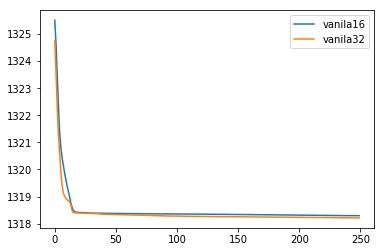

In [91]:
plt.plot(history16.history['loss'],label='vanila16')
plt.plot(history32.history['loss'],label='vanila32')
plt.legend()

#### regularized autoencoder

In [92]:
# regularized autoencoder
from keras import regularizers

In [93]:
input_size = 139
hidden_size = 32
output_size = 139

x = Input(shape=(input_size,))

# Encoder
h = Dense(hidden_size, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)

# Decoder
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(input=x, output=r)
autoencoder.compile(optimizer='adam', loss='mse')

C:\Users\Yang\.conda\envs\deepchembed\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [94]:
history_l1 = autoencoder.fit(data_train,data_train,epochs= 250,batch_size=256,shuffle=True)

Epoch 1/250
1063/1063 [==============================] - 0s 424us/step - loss: 1341.3910
Epoch 2/250
1063/1063 [==============================] - 0s 19us/step - loss: 1338.7364
Epoch 3/250
1063/1063 [==============================] - 0s 21us/step - loss: 1335.9856
Epoch 4/250
1063/1063 [==============================] - 0s 20us/step - loss: 1332.5633
Epoch 5/250
1063/1063 [==============================] - 0s 23us/step - loss: 1330.4474
Epoch 6/250
1063/1063 [==============================] - 0s 22us/step - loss: 1329.0348
Epoch 7/250
1063/1063 [==============================] - 0s 19us/step - loss: 1327.6935
Epoch 8/250
1063/1063 [==============================] - 0s 22us/step - loss: 1326.2768
Epoch 9/250
1063/1063 [==============================] - 0s 16us/step - loss: 1324.7559
Epoch 10/250
1063/1063 [==============================] - 0s 20us/step - loss: 1323.5533
Epoch 11/250
1063/1063 [==============================] - 0s 16us/step - loss: 1322.7854
Epoch 12/250
1063/1063 [=====

1063/1063 [==============================] - 0s 18us/step - loss: 1318.7454
Epoch 93/250
1063/1063 [==============================] - 0s 27us/step - loss: 1318.7434
Epoch 94/250
1063/1063 [==============================] - 0s 17us/step - loss: 1318.7400
Epoch 95/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.7383
Epoch 96/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.7359
Epoch 97/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.7344
Epoch 98/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.7310
Epoch 99/250
1063/1063 [==============================] - 0s 28us/step - loss: 1318.7296
Epoch 100/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.7287
Epoch 101/250
1063/1063 [==============================] - ETA: 0s - loss: 686.031 - 0s 23us/step - loss: 1318.7258
Epoch 102/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.7239
Epoch

Epoch 183/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.6290
Epoch 184/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.6280
Epoch 185/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.6280
Epoch 186/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.6285
Epoch 187/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.6259
Epoch 188/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.6251
Epoch 189/250
1063/1063 [==============================] - 0s 34us/step - loss: 1318.6254
Epoch 190/250
1063/1063 [==============================] - 0s 28us/step - loss: 1318.6237
Epoch 191/250
1063/1063 [==============================] - 0s 27us/step - loss: 1318.6233
Epoch 192/250
1063/1063 [==============================] - 0s 30us/step - loss: 1318.6230
Epoch 193/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.6224
Epoch 194/

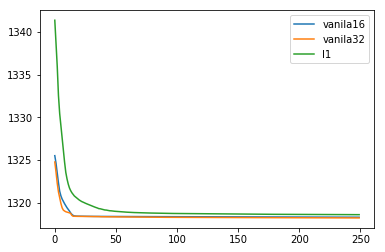

In [95]:
plt.plot(history16.history['loss'],label='vanila16')
plt.plot(history32.history['loss'],label='vanila32')
plt.plot(history_l1.history['loss'],label='l1')
plt.legend()

### A multilayer example

In [98]:
input_size = 139
hidden_size = 64
code_size = 32

x = Input(shape=(input_size,))

# Encoder
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)

# Decoder
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input=x, output=r)
autoencoder.compile(optimizer='adam', loss='mse')

C:\Users\Yang\.conda\envs\deepchembed\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [99]:
history_ml = autoencoder.fit(data_train,data_train,epochs= 250,batch_size=256,shuffle=True)

Epoch 1/250
1063/1063 [==============================] - 1s 559us/step - loss: 1322.8419
Epoch 2/250
1063/1063 [==============================] - 0s 24us/step - loss: 1321.3405
Epoch 3/250
1063/1063 [==============================] - 0s 18us/step - loss: 1320.6703
Epoch 4/250
1063/1063 [==============================] - 0s 27us/step - loss: 1320.0319
Epoch 5/250
1063/1063 [==============================] - 0s 27us/step - loss: 1319.4421
Epoch 6/250
1063/1063 [==============================] - 0s 26us/step - loss: 1319.1605
Epoch 7/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.9288
Epoch 8/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.6483
Epoch 9/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.4600
Epoch 10/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.4487
Epoch 11/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.4445
Epoch 12/250
1063/1063 [=====

1063/1063 [==============================] - 0s 27us/step - loss: 1318.2685
Epoch 94/250
1063/1063 [==============================] - 0s 26us/step - loss: 1318.2683
Epoch 95/250
1063/1063 [==============================] - 0s 26us/step - loss: 1318.2677
Epoch 96/250
1063/1063 [==============================] - 0s 26us/step - loss: 1318.2664
Epoch 97/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2655
Epoch 98/250
1063/1063 [==============================] - 0s 28us/step - loss: 1318.2645
Epoch 99/250
1063/1063 [==============================] - 0s 34us/step - loss: 1318.2631
Epoch 100/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2625
Epoch 101/250
1063/1063 [==============================] - 0s 33us/step - loss: 1318.2615
Epoch 102/250
1063/1063 [==============================] - 0s 27us/step - loss: 1318.2601
Epoch 103/250
1063/1063 [==============================] - 0s 31us/step - loss: 1318.2585
Epoch 104/250
1063/1063 [=====

1063/1063 [==============================] - 0s 23us/step - loss: 1318.2077
Epoch 185/250
1063/1063 [==============================] - 0s 24us/step - loss: 1318.2071
Epoch 186/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2070
Epoch 187/250
1063/1063 [==============================] - 0s 26us/step - loss: 1318.2064
Epoch 188/250
1063/1063 [==============================] - 0s 29us/step - loss: 1318.2060
Epoch 189/250
1063/1063 [==============================] - 0s 31us/step - loss: 1318.2058
Epoch 190/250
1063/1063 [==============================] - 0s 33us/step - loss: 1318.2053
Epoch 191/250
1063/1063 [==============================] - 0s 30us/step - loss: 1318.2047
Epoch 192/250
1063/1063 [==============================] - 0s 31us/step - loss: 1318.2045
Epoch 193/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2043
Epoch 194/250
1063/1063 [==============================] - 0s 30us/step - loss: 1318.2046
Epoch 195/250
1063/1063 

(1318, 1319)

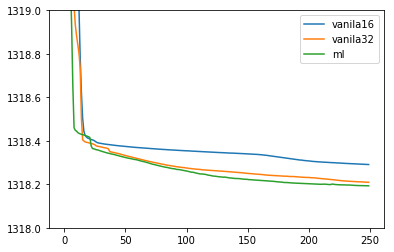

In [101]:
plt.plot(history16.history['loss'],label='vanila16')
plt.plot(history32.history['loss'],label='vanila32')

plt.plot(history_ml.history['loss'],label='ml')
plt.legend()
plt.ylim([1318,1319]) #zoom